# **Lab2 task**

Use pytorch/Tensorflow to implement an specific classification DNN model, dataset Fashion MNIST

1.   Design model by keras.sequential model, 3 layer of CNN network (10%), 3 layer of NN network (10%)

1.   Comparison w/ and w/o Batch Normalizatoin Layer (10%)

1.   Comparison w/ arbitrary layer of abovementioned CNN network. (10%)

1.   Print model summary and plot model (10%)

1.   Print test accuracy, plot train-epoch, val-epoch, train-loss, val-loss (20%)
2.   Plot certain image from dataset and successively predict (10%)

1.   Report(30%)


**Q&A: course.aislab@gmail.com**








# Import from framework

In [105]:
!pip install utils
import tensorflow as tf
import pickle
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.utils import plot_model
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from sklearn import metrics

# Load dataset

In [192]:
# Load MNIST dataset
# Keras images are 28x28 array rather than a 1D array of size 784
# Pixels intensities are integers (0 to 255) rather than floats (0.0 to 255.0)

(train_X, train_y), (test_X, test_y) = load_data()

train_X = train_X.reshape(-1, 28, 28, 1) # "-1"menas auto calculate
test_X = test_X.reshape(-1, 28, 28, 1)

train_X = train_X.astype('float32') / 255.0 # Normalization
test_X = test_X.astype('float32') / 255.0

train_y = train_y.reshape(-1,1)
test_y  = test_y.reshape(-1,1)

train_y = tf.keras.utils.to_categorical(train_y,10)
test_y = tf.keras.utils.to_categorical(test_y,10)

#lr = np.arange(10)
# transform labels into one hot representation
#train_y= (lr==train_y).astype(np.float64)
#test_y = (lr==test_y).astype(np.float64)

# Dataset already split in Training and Testing
# Train_X for images and train_y for labels
#shape of train_X should be (6000, 28, 28, 1), which is (class, height, width, channel)
#shape of train_y should be (6000, 1), which is (class, channel(only needs one to store class info))

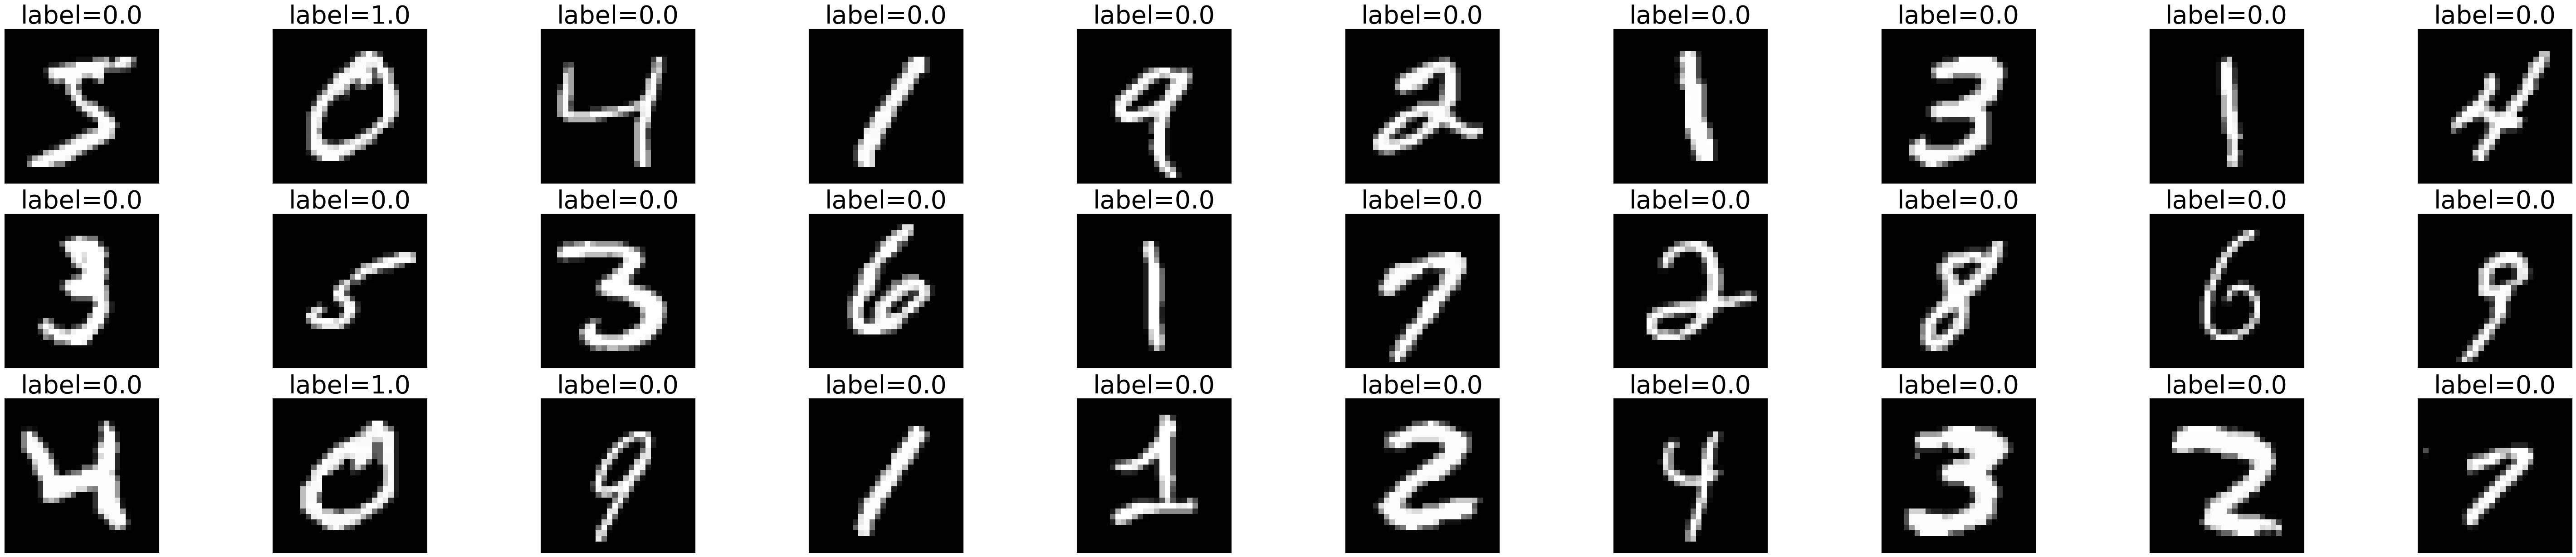

In [158]:
#show some image from MNIST dataset
imageMNIST = plt.figure(figsize=(75,15))
for i in range (30):
  ax = imageMNIST.add_subplot(3,10, i+1, xticks=[], yticks=[]) # remove xticks and yticks
  ax.imshow(np.squeeze(train_X[i]), cmap='gray')
  ax.set_title('label=' + str(train_y[i][0]), fontsize=40)

# Fill up the configuration for model

In [193]:
#Settings:
#inputShape = (height,width,depth)
InputShape = (28,28,1)
classes = 10
num_epochs = 10
num_batch_size = 100
num_validation_split = 0.2

#show input shape
print(InputShape)

(28, 28, 1)


#Baseline

# 三層CNN(wihtout BatchNormalization)


In [218]:

#model.add to add layer
#model.add(layer_name(number_of_filters, (window_size,window_size), input_shape))

#2 way of adding activation function
#(1)model.add(Activation("relu"))
#(2)model.add(Dense(1), activation="relu")
model = Sequential()
model.add(Conv2D(filters=20,kernel_size=(3,3),input_shape=InputShape,activation='relu'))
model.add(Conv2D(filters=20,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(filters=20,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(classes,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Model: "sequential_56"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_150 (Conv2D)         (None, 26, 26, 20)        200       
                                                                 
 conv2d_151 (Conv2D)         (None, 24, 24, 20)        3620      
                                                                 
 conv2d_152 (Conv2D)         (None, 22, 22, 20)        3620      
                                                                 
 max_pooling2d_135 (MaxPool  (None, 11, 11, 20)        0         
 ing2D)                                                          
                                                                 
 flatten_41 (Flatten)        (None, 2420)              0         
                                                                 
 dense_78 (Dense)            (None, 10)                24210     
                                                     

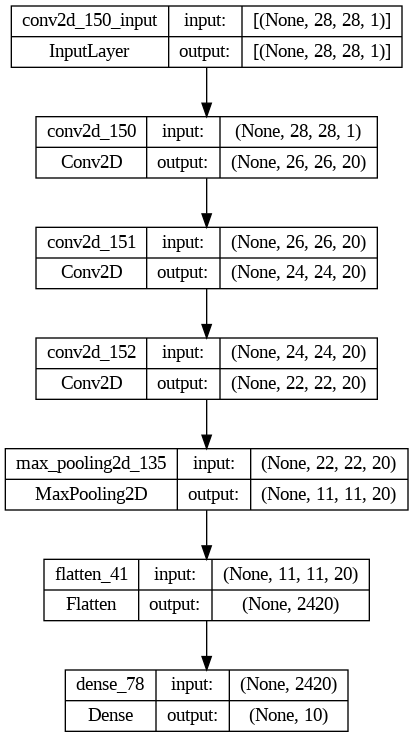

In [219]:
#print model
model.summary()
#plot model
tf.keras.utils.plot_model(model,show_shapes=True)

In [220]:
# train model
train_history=model.fit(x=train_X,y=train_y,validation_split=num_validation_split, epochs=num_epochs, batch_size=num_batch_size)

Epoch 1/10
480/480 [==============================] - 5s 7ms/step - loss: 0.2786 - accuracy: 0.9204 - val_loss: 0.0829 - val_accuracy: 0.9768
Epoch 2/10
480/480 [==============================] - 3s 5ms/step - loss: 0.0747 - accuracy: 0.9772 - val_loss: 0.0683 - val_accuracy: 0.9810
Epoch 3/10
480/480 [==============================] - 3s 5ms/step - loss: 0.0537 - accuracy: 0.9832 - val_loss: 0.0589 - val_accuracy: 0.9829
Epoch 4/10
480/480 [==============================] - 2s 5ms/step - loss: 0.0420 - accuracy: 0.9872 - val_loss: 0.0504 - val_accuracy: 0.9857
Epoch 5/10
480/480 [==============================] - 3s 6ms/step - loss: 0.0331 - accuracy: 0.9897 - val_loss: 0.0568 - val_accuracy: 0.9838
Epoch 6/10
480/480 [==============================] - 3s 6ms/step - loss: 0.0274 - accuracy: 0.9916 - val_loss: 0.0523 - val_accuracy: 0.9858
Epoch 7/10
480/480 [==============================] - 3s 5ms/step - loss: 0.0232 - accuracy: 0.9926 - val_loss: 0.0484 - val_accuracy: 0.9871
Epoch 

100/100 [==============================] - 0s 3ms/step - loss: 0.0506 - accuracy: 0.9854
test accuracy = 0.9854000210762024


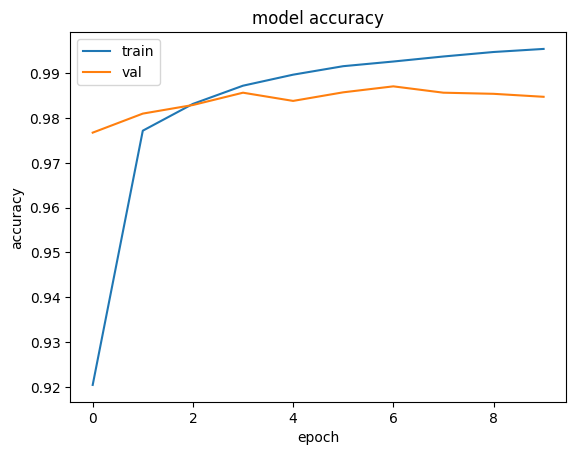

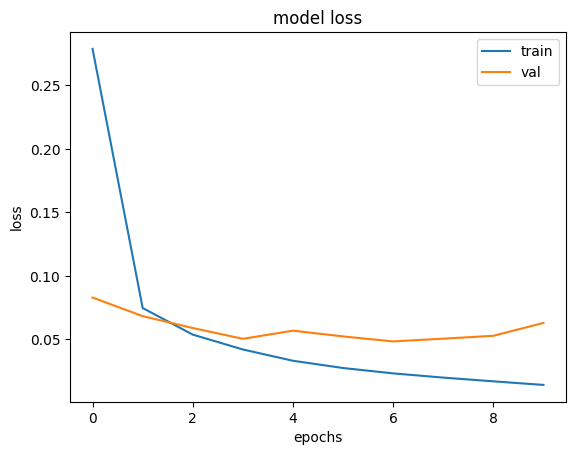

In [221]:
#evalutate the model
test_result = model.evaluate(test_X,test_y, batch_size=num_batch_size)
print(f"test accuracy = {test_result[1]}")
#plot and print

#ACC圖
plt.plot(train_history.history['accuracy'],label='train')
plt.plot(train_history.history['val_accuracy'],label='val')
plt.legend()
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()
#LOSS圖

plt.plot(train_history.history['loss'],label='train')
plt.plot(train_history.history['val_loss'],label='val')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()
plt.show()


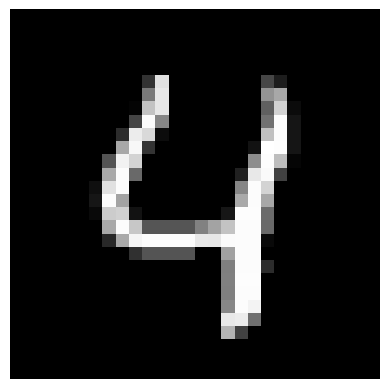

1/1 [==============================] - 0s 137ms/step
predicted: 4


In [222]:
#predict certian image from test dataset
#show image
image1 = test_X[4] # shape = (28, 28, 1)
plt.imshow(np.squeeze(image1), cmap='gray')
plt.axis('off')
plt.show()

#predict result
image1 = image1.reshape(-1,28,28,1)
p = model.predict(image1)
print('predicted: {}'.format(np.argmax(p)))

#3層NN

In [250]:
train_X = train_X.reshape(60000, 784).astype('float32')
test_X = test_X.reshape(10000, 784).astype('float32')

In [251]:
#model.add to add layer
#model.add(layer_name(number_of_filters, (window_size,window_size), input_shape))

#2 way of adding activation function
#(1)model.add(Activation("relu"))
#(2)model.add(Dense(1), activation="relu")

model = Sequential()
#model.add(Flatten())
model.add(Dense(16,input_shape=(784,), activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(classes,activation='softmax'))
#model compile to configure model
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Model: "sequential_61"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_86 (Dense)            (None, 16)                12560     
                                                                 
 dense_87 (Dense)            (None, 16)                272       
                                                                 
 dense_88 (Dense)            (None, 16)                272       
                                                                 
 dense_89 (Dense)            (None, 10)                170       
                                                                 
Total params: 13274 (51.85 KB)
Trainable params: 13274 (51.85 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


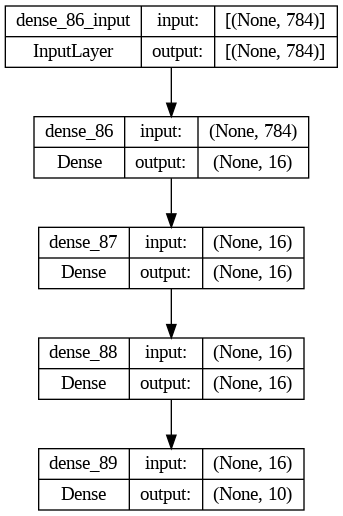

In [252]:
#print model
model.summary()
#plot model
tf.keras.utils.plot_model(model,show_shapes=True)

In [253]:
#model fit to train model
train_history_nn=model.fit(x=train_X, y=train_Y,validation_split=num_validation_split,epochs=num_epochs,batch_size=num_batch_size)

Epoch 1/10
480/480 [==============================] - 3s 4ms/step - loss: 0.8849 - accuracy: 0.7225 - val_loss: 0.3282 - val_accuracy: 0.9071
Epoch 2/10
480/480 [==============================] - 2s 4ms/step - loss: 0.3074 - accuracy: 0.9096 - val_loss: 0.2498 - val_accuracy: 0.9268
Epoch 3/10
480/480 [==============================] - 2s 5ms/step - loss: 0.2483 - accuracy: 0.9263 - val_loss: 0.2346 - val_accuracy: 0.9327
Epoch 4/10
480/480 [==============================] - 2s 5ms/step - loss: 0.2180 - accuracy: 0.9355 - val_loss: 0.2009 - val_accuracy: 0.9439
Epoch 5/10
480/480 [==============================] - 2s 4ms/step - loss: 0.1949 - accuracy: 0.9420 - val_loss: 0.1902 - val_accuracy: 0.9474
Epoch 6/10
480/480 [==============================] - 2s 4ms/step - loss: 0.1774 - accuracy: 0.9474 - val_loss: 0.1828 - val_accuracy: 0.9492
Epoch 7/10
480/480 [==============================] - 2s 4ms/step - loss: 0.1659 - accuracy: 0.9505 - val_loss: 0.1732 - val_accuracy: 0.9506
Epoch 

100/100 [==============================] - 1s 5ms/step - loss: 0.0456 - accuracy: 0.9862
test accuracy = 0.9861999750137329


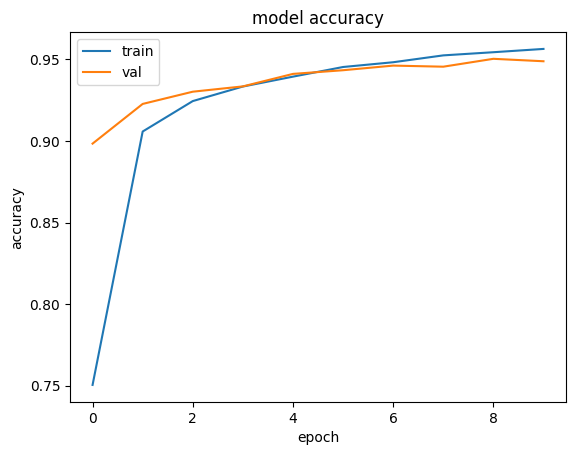

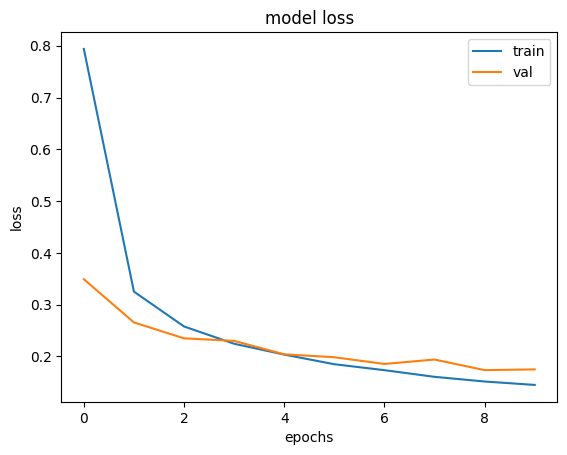

In [249]:
#evalutate the model
test_result = model.evaluate(test_X,test_y, batch_size=num_batch_size)
print(f"test accuracy = {test_result[1]}")
#plot and print

#ACC圖
plt.plot(train_history_nn.history['accuracy'],label='train')
plt.plot(train_history_nn.history['val_accuracy'],label='val')
plt.legend()
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()
#LOSS圖

plt.plot(train_history_nn.history['loss'],label='train')
plt.plot(train_history_nn.history['val_loss'],label='val')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()
plt.show()

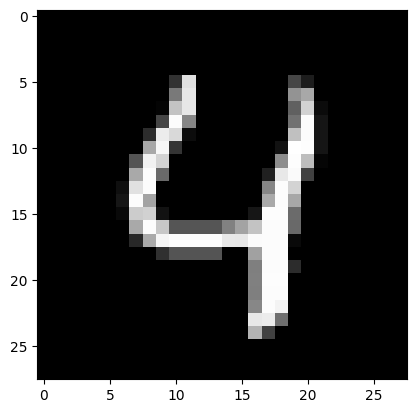

1/1 [==============================] - 0s 78ms/step
predicted: 4


In [233]:
#predict certian image from test dataset
#show image
train_X = train_X.reshape(-1, 28, 28, 1) # "-1"menas auto calculate
test_X = test_X.reshape(-1, 28, 28, 1)
image1 = test_X[4]
plt.imshow(np.squeeze(image1), cmap='gray')
plt.show()

#predict result
#image1 = image1.reshape(-1,28,28,1)
image1 = image1.reshape(1, 784).astype('float32')
p = model.predict([image1])
print('predicted: {}'.format(np.argmax(p)))

# 比較有無BatchNormalization

#CNN with BN

In [234]:
#model.add to add layer
#model.add(layer_name(number_of_filters, (window_size,window_size), input_shape))

#2 way of adding activation function
#(1)model.add(Activation("relu"))
#(2)model.add(Dense(1), activation="relu")
model = Sequential()
model.add(Conv2D(filters=20,kernel_size=(3,3),input_shape=InputShape,activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=20,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=20,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(classes,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Model: "sequential_58"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_153 (Conv2D)         (None, 26, 26, 20)        200       
                                                                 
 batch_normalization_38 (Ba  (None, 26, 26, 20)        80        
 tchNormalization)                                               
                                                                 
 conv2d_154 (Conv2D)         (None, 24, 24, 20)        3620      
                                                                 
 batch_normalization_39 (Ba  (None, 24, 24, 20)        80        
 tchNormalization)                                               
                                                                 
 conv2d_155 (Conv2D)         (None, 22, 22, 20)        3620      
                                                                 
 batch_normalization_40 (Ba  (None, 22, 22, 20)      

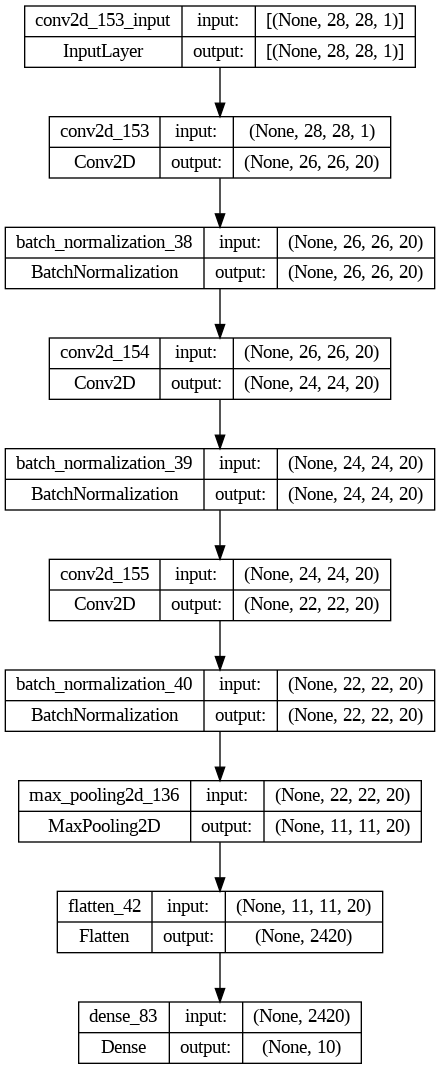

In [235]:
#print model
model.summary()
#plot model
tf.keras.utils.plot_model(model, show_shapes=True)

In [236]:
#model fit to train model
train_history_CNN_W=model.fit(x=train_X, y=train_y,validation_split=num_validation_split,epochs=num_epochs,batch_size=num_batch_size)

Epoch 1/10
480/480 [==============================] - 7s 8ms/step - loss: 0.1649 - accuracy: 0.9506 - val_loss: 0.1531 - val_accuracy: 0.9548
Epoch 2/10
480/480 [==============================] - 3s 6ms/step - loss: 0.0536 - accuracy: 0.9833 - val_loss: 0.0685 - val_accuracy: 0.9799
Epoch 3/10
480/480 [==============================] - 3s 6ms/step - loss: 0.0378 - accuracy: 0.9881 - val_loss: 0.0548 - val_accuracy: 0.9846
Epoch 4/10
480/480 [==============================] - 6s 12ms/step - loss: 0.0315 - accuracy: 0.9893 - val_loss: 0.0508 - val_accuracy: 0.9859
Epoch 5/10
480/480 [==============================] - 3s 6ms/step - loss: 0.0245 - accuracy: 0.9922 - val_loss: 0.0556 - val_accuracy: 0.9839
Epoch 6/10
480/480 [==============================] - 3s 6ms/step - loss: 0.0171 - accuracy: 0.9943 - val_loss: 0.0706 - val_accuracy: 0.9819
Epoch 7/10
480/480 [==============================] - 3s 6ms/step - loss: 0.0153 - accuracy: 0.9949 - val_loss: 0.0659 - val_accuracy: 0.9844
Epoch

100/100 [==============================] - 0s 3ms/step - loss: 0.1112 - accuracy: 0.9773
test accuracy = 0.9772999882698059


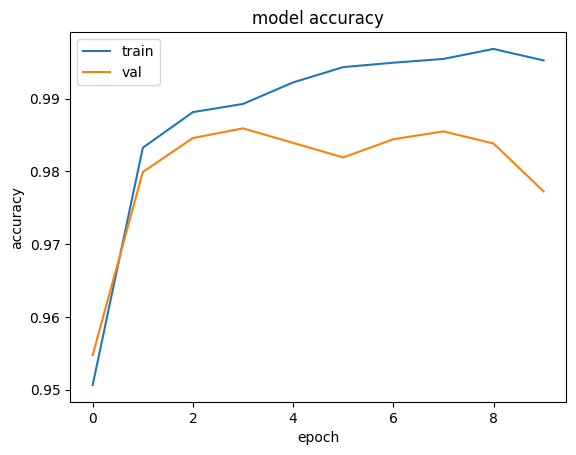

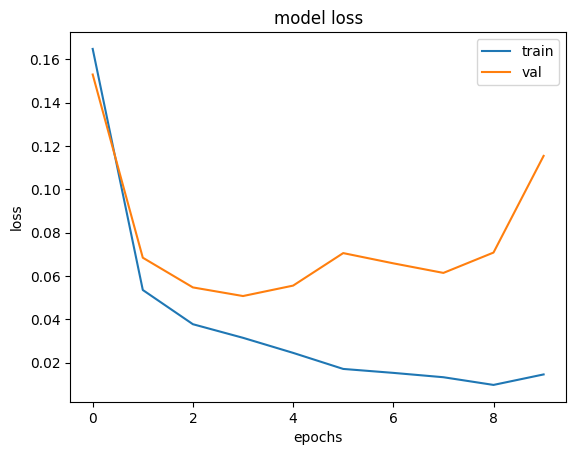

In [237]:
#evalutate the model
test_result = model.evaluate(test_X,test_y, batch_size=num_batch_size)
print(f"test accuracy = {test_result[1]}")
#plot and print

#ACC圖
plt.plot(train_history_CNN_W.history['accuracy'],label='train')
plt.plot(train_history_CNN_W.history['val_accuracy'],label='val')
plt.legend()
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()
#LOSS圖

plt.plot(train_history_CNN_W.history['loss'],label='train')
plt.plot(train_history_CNN_W.history['val_loss'],label='val')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()
plt.show()

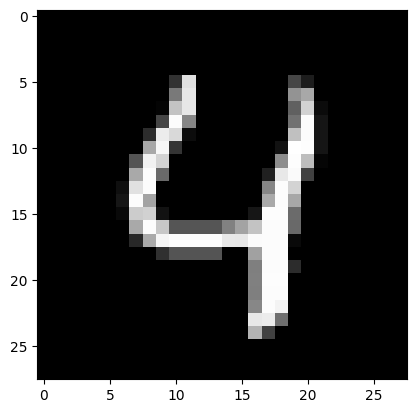

1/1 [==============================] - 0s 86ms/step
predicted: 4


In [238]:
#predict certian image from test dataset
#show image
train_X = train_X.reshape(-1, 28, 28, 1) # "-1"menas auto calculate
test_X = test_X.reshape(-1, 28, 28, 1)
image1 = test_X[4]
plt.imshow(np.squeeze(image1), cmap='gray')
plt.show()

#predict result
image1 = image1.reshape(-1,28,28,1)
#image1 = image1.reshape(1, 784).astype('float32')
p = model.predict([image1])
print('predicted: {}'.format(np.argmax(p)))

# 比較不同層數CNN的accuracy

#一層CNN

In [239]:
#model.add to add layer
#model.add(layer_name(number_of_filters, (window_size,window_size), input_shape))

#2 way of adding activation function
#(1)model.add(Activation("relu"))
#(2)model.add(Dense(1), activation="relu")
model = Sequential()
model.add(Conv2D(filters=20,kernel_size=(3,3),input_shape=InputShape,activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #pool_size=(2, 2)，將64個26x26，縮小為64個13x13
model.add(Flatten())
model.add(Dense(classes,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Model: "sequential_59"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_156 (Conv2D)         (None, 26, 26, 20)        200       
                                                                 
 max_pooling2d_137 (MaxPool  (None, 13, 13, 20)        0         
 ing2D)                                                          
                                                                 
 flatten_43 (Flatten)        (None, 3380)              0         
                                                                 
 dense_84 (Dense)            (None, 10)                33810     
                                                                 
Total params: 34010 (132.85 KB)
Trainable params: 34010 (132.85 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


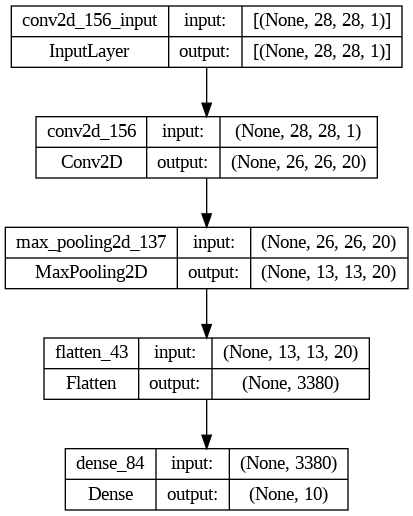

In [240]:
#print model
model.summary()
#plot model
tf.keras.utils.plot_model(model, show_shapes=True)

In [241]:
#model fit to train model
train_history_CNN_1=model.fit(x=train_X, y=train_y,validation_split=num_validation_split,epochs=num_epochs,batch_size=num_batch_size)

Epoch 1/10
480/480 [==============================] - 3s 4ms/step - loss: 0.4180 - accuracy: 0.8866 - val_loss: 0.2138 - val_accuracy: 0.9396
Epoch 2/10
480/480 [==============================] - 2s 4ms/step - loss: 0.1708 - accuracy: 0.9509 - val_loss: 0.1357 - val_accuracy: 0.9609
Epoch 3/10
480/480 [==============================] - 2s 4ms/step - loss: 0.1207 - accuracy: 0.9657 - val_loss: 0.1109 - val_accuracy: 0.9695
Epoch 4/10
480/480 [==============================] - 2s 4ms/step - loss: 0.0981 - accuracy: 0.9724 - val_loss: 0.0985 - val_accuracy: 0.9722
Epoch 5/10
480/480 [==============================] - 3s 5ms/step - loss: 0.0846 - accuracy: 0.9757 - val_loss: 0.0870 - val_accuracy: 0.9751
Epoch 6/10
480/480 [==============================] - 2s 5ms/step - loss: 0.0738 - accuracy: 0.9788 - val_loss: 0.0824 - val_accuracy: 0.9761
Epoch 7/10
480/480 [==============================] - 2s 4ms/step - loss: 0.0662 - accuracy: 0.9809 - val_loss: 0.0797 - val_accuracy: 0.9775
Epoch 

100/100 [==============================] - 0s 2ms/step - loss: 0.0627 - accuracy: 0.9795
test accuracy = 0.9794999957084656


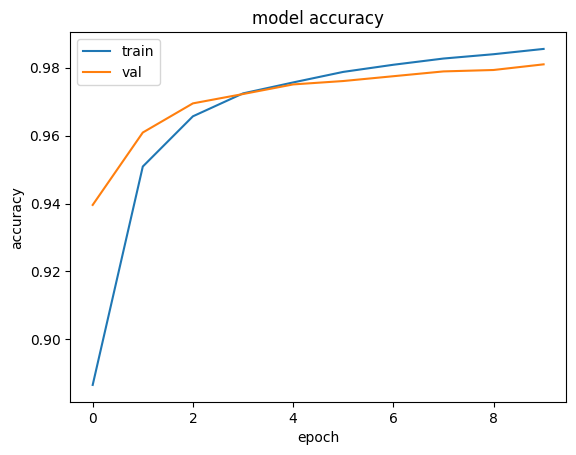

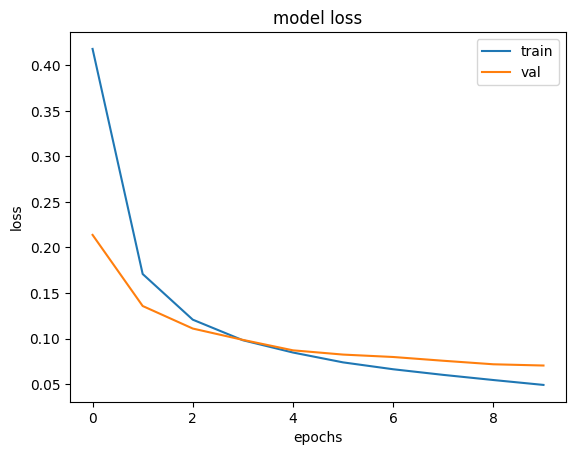

In [242]:
#evalutate the model
test_result = model.evaluate(test_X,test_y, batch_size=num_batch_size)
print(f"test accuracy = {test_result[1]}")
#plot and print

#ACC圖
plt.plot(train_history_CNN_1.history['accuracy'],label='train')
plt.plot(train_history_CNN_1.history['val_accuracy'],label='val')
plt.legend()
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()
#LOSS圖

plt.plot(train_history_CNN_1.history['loss'],label='train')
plt.plot(train_history_CNN_1.history['val_loss'],label='val')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()
plt.show()

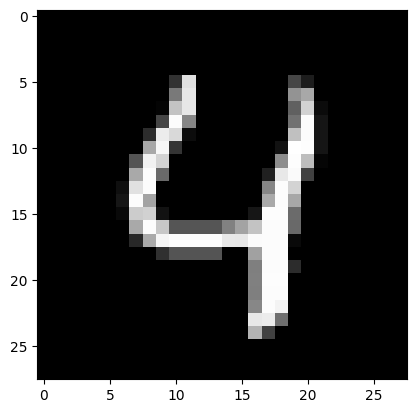

1/1 [==============================] - 0s 78ms/step
predicted: 4


In [243]:
#predict certian image from test dataset
#show image
train_X = train_X.reshape(-1, 28, 28, 1) # "-1"menas auto calculate
test_X = test_X.reshape(-1, 28, 28, 1)
image1 = test_X[4]
plt.imshow(np.squeeze(image1), cmap='gray')
plt.show()

#predict result
image1 = image1.reshape(-1,28,28,1)
#image1 = image1.reshape(1, 784).astype('float32')
p = model.predict([image1])
print('predicted: {}'.format(np.argmax(p)))

#兩層CNN

In [244]:
#model.add to add layer
#model.add(layer_name(number_of_filters, (window_size,window_size), input_shape))

#2 way of adding activation function
#(1)model.add(Activation("relu"))
#(2)model.add(Dense(1), activation="relu")
model = Sequential()
model.add(Conv2D(filters=20,kernel_size=(3,3),input_shape=InputShape,activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #pool_size=(2, 2)，將64個26x26，縮小為64個13x13
model.add(Conv2D(filters=20,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(classes,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Model: "sequential_60"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_157 (Conv2D)         (None, 26, 26, 20)        200       
                                                                 
 max_pooling2d_138 (MaxPool  (None, 13, 13, 20)        0         
 ing2D)                                                          
                                                                 
 conv2d_158 (Conv2D)         (None, 11, 11, 20)        3620      
                                                                 
 max_pooling2d_139 (MaxPool  (None, 5, 5, 20)          0         
 ing2D)                                                          
                                                                 
 flatten_44 (Flatten)        (None, 500)               0         
                                                                 
 dense_85 (Dense)            (None, 10)              

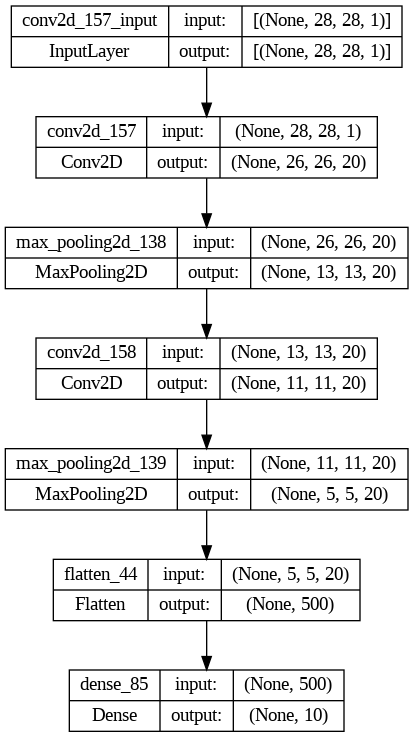

In [245]:
#print model
model.summary()
#plot model
tf.keras.utils.plot_model(model, show_shapes=True)

In [246]:
#model fit to train model
train_history_CNN_2=model.fit(x=train_X, y=train_y,validation_split=num_validation_split,epochs=num_epochs,batch_size=num_batch_size)

Epoch 1/10
480/480 [==============================] - 4s 5ms/step - loss: 0.4178 - accuracy: 0.8811 - val_loss: 0.1246 - val_accuracy: 0.9636
Epoch 2/10
480/480 [==============================] - 2s 4ms/step - loss: 0.1022 - accuracy: 0.9689 - val_loss: 0.0875 - val_accuracy: 0.9738
Epoch 3/10
480/480 [==============================] - 2s 4ms/step - loss: 0.0767 - accuracy: 0.9770 - val_loss: 0.0694 - val_accuracy: 0.9780
Epoch 4/10
480/480 [==============================] - 2s 4ms/step - loss: 0.0643 - accuracy: 0.9806 - val_loss: 0.0651 - val_accuracy: 0.9817
Epoch 5/10
480/480 [==============================] - 3s 5ms/step - loss: 0.0569 - accuracy: 0.9825 - val_loss: 0.0644 - val_accuracy: 0.9805
Epoch 6/10
480/480 [==============================] - 2s 5ms/step - loss: 0.0509 - accuracy: 0.9842 - val_loss: 0.0587 - val_accuracy: 0.9821
Epoch 7/10
480/480 [==============================] - 2s 4ms/step - loss: 0.0458 - accuracy: 0.9856 - val_loss: 0.0543 - val_accuracy: 0.9835
Epoch 

100/100 [==============================] - 0s 2ms/step - loss: 0.0456 - accuracy: 0.9862
test accuracy = 0.9861999750137329


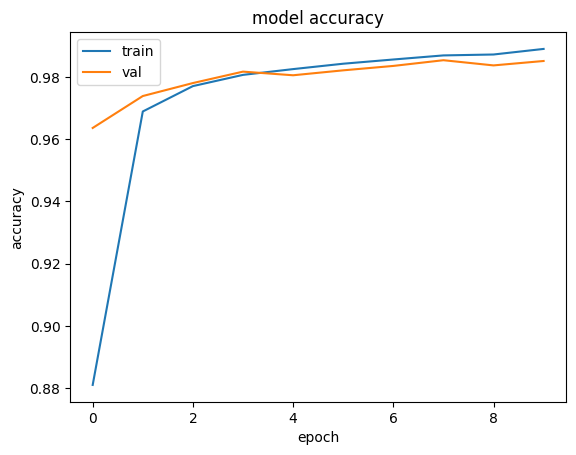

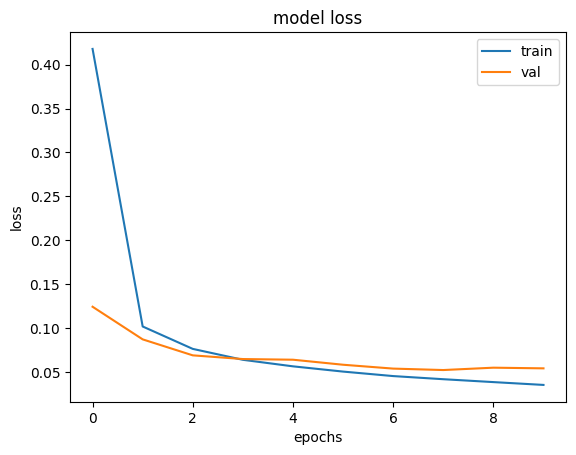

In [247]:
#evalutate the model
test_result = model.evaluate(test_X,test_y, batch_size=num_batch_size)
print(f"test accuracy = {test_result[1]}")
#plot and print

#ACC圖
plt.plot(train_history_CNN_2.history['accuracy'],label='train')
plt.plot(train_history_CNN_2.history['val_accuracy'],label='val')
plt.legend()
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()
#LOSS圖

plt.plot(train_history_CNN_2.history['loss'],label='train')
plt.plot(train_history_CNN_2.history['val_loss'],label='val')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()
plt.show()

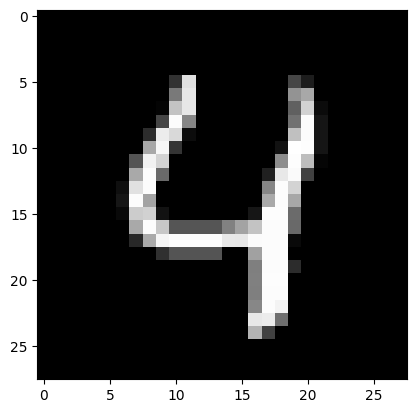

1/1 [==============================] - 0s 64ms/step
predicted: 4


In [248]:
#predict certian image from test dataset
#show image
train_X = train_X.reshape(-1, 28, 28, 1) # "-1"menas auto calculate
test_X = test_X.reshape(-1, 28, 28, 1)
image1 = test_X[4]
plt.imshow(np.squeeze(image1), cmap='gray')
plt.show()

#predict result
image1 = image1.reshape(-1,28,28,1)
#image1 = image1.reshape(1, 784).astype('float32')
p = model.predict([image1])
print('predicted: {}'.format(np.argmax(p)))

# Final Model CNN+NN+BN

In [213]:
#model.add to add layer
#model.add(layer_name(number_of_filters, (window_size,window_size), input_shape))

#2 way of adding activation function
#(1)model.add(Activation("relu"))
#(2)model.add(Dense(1), activation="relu")
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=InputShape,activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(classes,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Model: "sequential_55"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_146 (Conv2D)         (None, 26, 26, 32)        320       
                                                                 
 batch_normalization_32 (Ba  (None, 26, 26, 32)        128       
 tchNormalization)                                               
                                                                 
 conv2d_147 (Conv2D)         (None, 24, 24, 32)        9248      
                                                                 
 batch_normalization_33 (Ba  (None, 24, 24, 32)        128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_133 (MaxPool  (None, 12, 12, 32)        0         
 ing2D)                                                          
                                                     

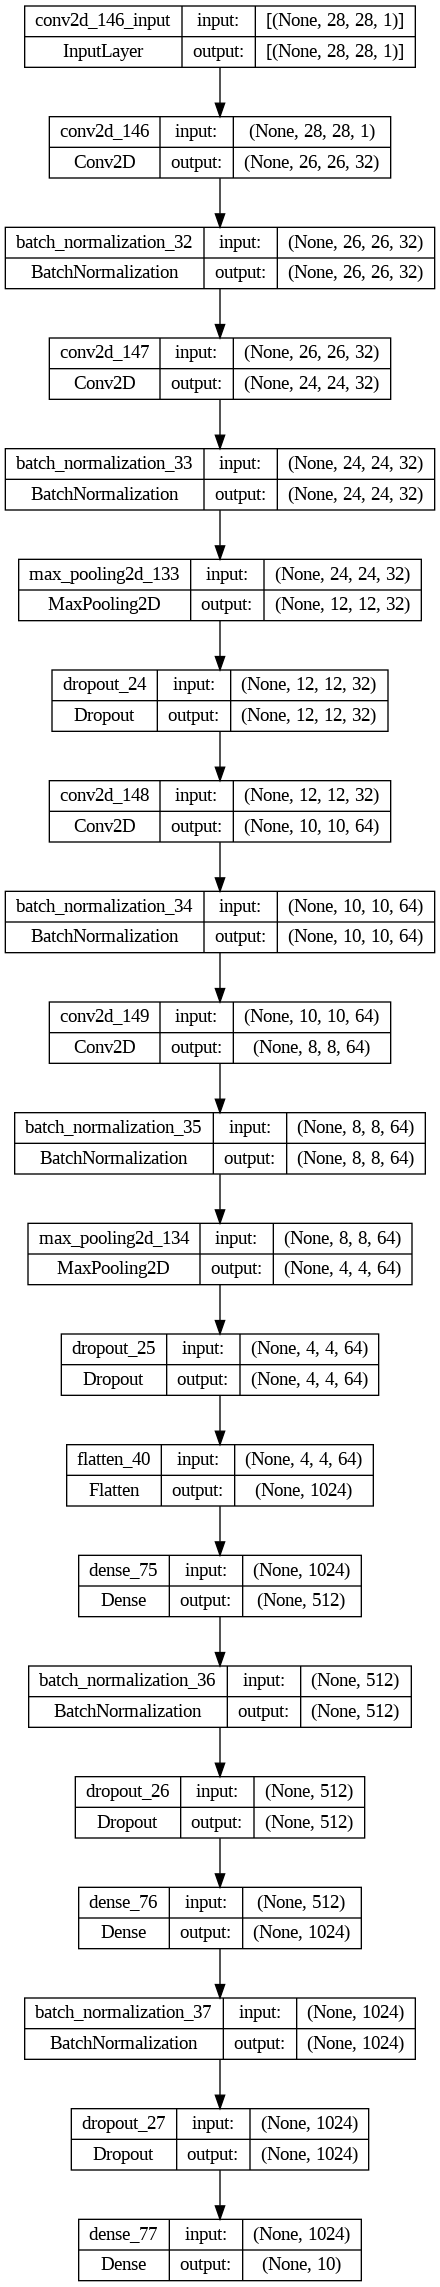

In [214]:
#print model
model.summary()
#plot model
tf.keras.utils.plot_model(model, show_shapes=True)

In [215]:
#model fit to train model
train_history_final=model.fit(x=train_X, y=train_y,validation_split=num_validation_split,epochs=num_epochs,batch_size=num_batch_size)

Epoch 1/10
480/480 [==============================] - 10s 10ms/step - loss: 0.2271 - accuracy: 0.9356 - val_loss: 0.9339 - val_accuracy: 0.7968
Epoch 2/10
480/480 [==============================] - 5s 10ms/step - loss: 0.0763 - accuracy: 0.9765 - val_loss: 0.0373 - val_accuracy: 0.9892
Epoch 3/10
480/480 [==============================] - 5s 11ms/step - loss: 0.0595 - accuracy: 0.9821 - val_loss: 0.0371 - val_accuracy: 0.9901
Epoch 4/10
480/480 [==============================] - 5s 10ms/step - loss: 0.0480 - accuracy: 0.9851 - val_loss: 0.0348 - val_accuracy: 0.9900
Epoch 5/10
480/480 [==============================] - 5s 10ms/step - loss: 0.0404 - accuracy: 0.9880 - val_loss: 0.0326 - val_accuracy: 0.9912
Epoch 6/10
480/480 [==============================] - 5s 10ms/step - loss: 0.0358 - accuracy: 0.9891 - val_loss: 0.0345 - val_accuracy: 0.9902
Epoch 7/10
480/480 [==============================] - 5s 10ms/step - loss: 0.0373 - accuracy: 0.9888 - val_loss: 0.0327 - val_accuracy: 0.991

100/100 [==============================] - 1s 5ms/step - loss: 0.1676 - accuracy: 0.9517
test accuracy = 0.95169997215271


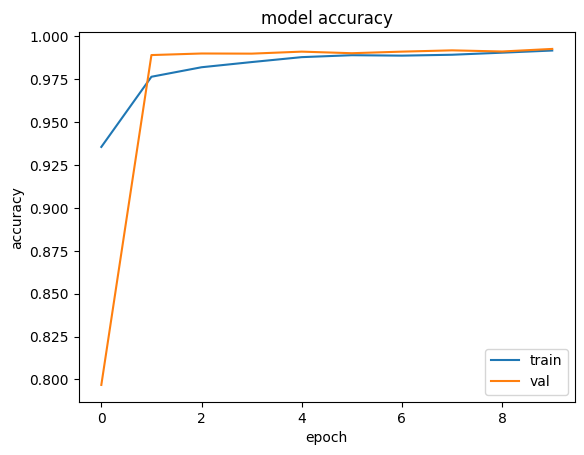

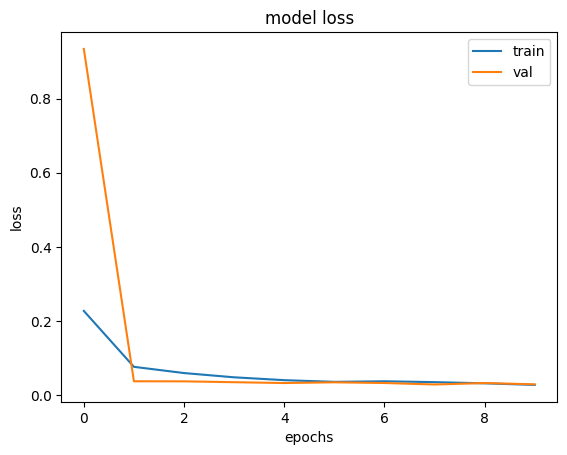

In [254]:
#evalutate the model
test_result = model.evaluate(test_X,test_y, batch_size=num_batch_size)
print(f"test accuracy = {test_result[1]}")
#plot and print

#ACC圖
plt.plot(train_history_final.history['accuracy'],label='train')
plt.plot(train_history_final.history['val_accuracy'],label='val')
plt.legend()
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()
#LOSS圖

plt.plot(train_history_final.history['loss'],label='train')
plt.plot(train_history_final.history['val_loss'],label='val')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()
plt.show()

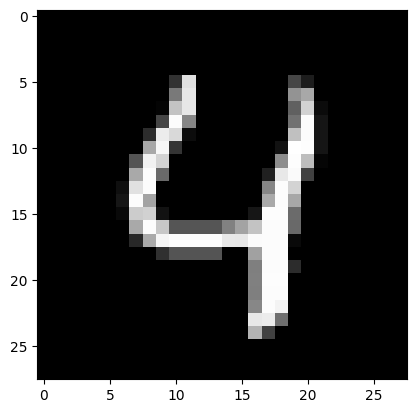

1/1 [==============================] - 0s 306ms/step
predicted: 4


In [217]:
#predict certian image from test dataset
#show image
train_X = train_X.reshape(-1, 28, 28, 1) # "-1"menas auto calculate
test_X = test_X.reshape(-1, 28, 28, 1)
image1 = test_X[4]
plt.imshow(np.squeeze(image1), cmap='gray')
plt.show()

#predict result
image1 = image1.reshape(-1,28,28,1)
#image1 = image1.reshape(1, 784).astype('float32')
p = model.predict([image1])
print('predicted: {}'.format(np.argmax(p)))